In [166]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

In [181]:
#with open('../oof/Booster_weight-multi-logloss-0.577933_2018-12-02-07-02-23.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.566286_2018-12-02-08-39-08.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.564319_2018-12-03-21-33-50.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.834371_2018-12-12-12-09-43.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.579404_2018-12-12-12-24-55.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.0705761_2018-12-12-13-27-56.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.551369_2018-12-10-22-50-39.pkl', 'rb') as fin:
#with open('../oof/Booster_weight-multi-logloss-0.514449_2018-12-12-13-52-58.pkl', 'rb') as fin: # upsample 無し
#with open('../oof/Booster_weight-multi-logloss-0.517905_2018-12-12-14-16-54.pkl', 'rb') as fin: # upsample あり
#with open('../oof/Booster_weight-multi-logloss-0.50734_2018-12-12-16-11-39.pkl', 'rb') as fin: # upsample あり
with open('../oof/Booster_weight-multi-logloss-0.507224_2018-12-12-17-06-35.pkl', 'rb') as fin: # upsample あり
    oof = pickle.load(fin)

In [182]:
res = []
preds = []
y_true = []

for _oof in oof:
    preds.append(_oof[0])
    y_true.append(_oof[1])

In [183]:
preds = np.concatenate(preds)
y_true = np.concatenate(y_true)
weight = np.array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])
weight = weight / preds.sum(axis=0)

In [184]:
multi_weighted_logloss(y_true, preds), multi_weighted_logloss(y_true, preds * weight)

(0.6146554835197139, 0.4930063798396614)

In [170]:
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    classes = ['class_' + str(clnum)
                for clnum in [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]]
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    cm_df[cm_df.columns] = cm_df.values / cm_df.sum(axis=1).values.reshape(-1, 1)
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

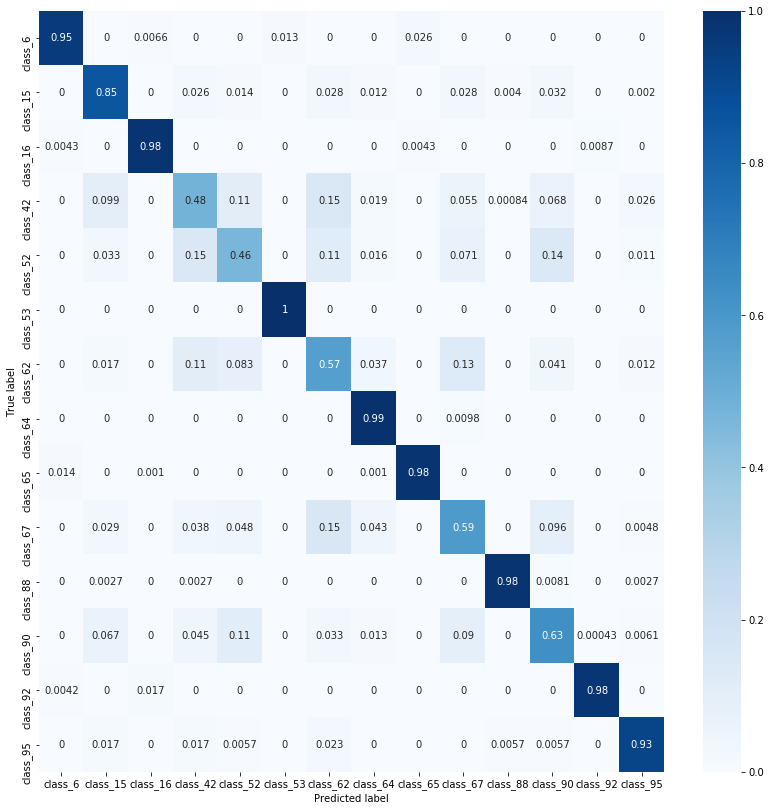

In [185]:
plot_cm(y_true, np.argmax(preds * weight, axis=1))

In [144]:
up_preds = np.concatenate(preds)
up_y_true = np.concatenate(y_true)
up_weight = np.array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])
up_weight = up_weight / up_preds.sum(axis=0)

In [141]:
noup_preds = np.concatenate(preds)
noup_y_true = np.concatenate(y_true)
noup_weight = np.array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])
noup_weight = noup_weight / noup_preds.sum(axis=0)

In [145]:
multi_weighted_logloss(up_y_true, up_preds), multi_weighted_logloss(up_y_true, up_preds * up_weight), multi_weighted_logloss(up_y_true, up_preds * noup_weight)

(0.6344722351467112, 0.5032302563537958, 0.5041747356144092)

In [147]:
multi_weighted_logloss(noup_y_true, noup_preds), multi_weighted_logloss(up_y_true, noup_preds * up_weight), multi_weighted_logloss(up_y_true, noup_preds * noup_weight)

(0.7367338071106957, 0.5215045697956777, 0.513746424579223)

In [148]:
noup_preds.sum(axis=0)

array([ 140.34146054,  464.21691382,  925.11667356, 1225.71744667,
        136.27635093,   34.51101147,  460.79717095,   90.65104958,
        994.82666354,  164.47774894,  364.27864898, 2445.99601624,
        236.52416733,  164.26867745])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7a9482fd0>,
      dtype=object)

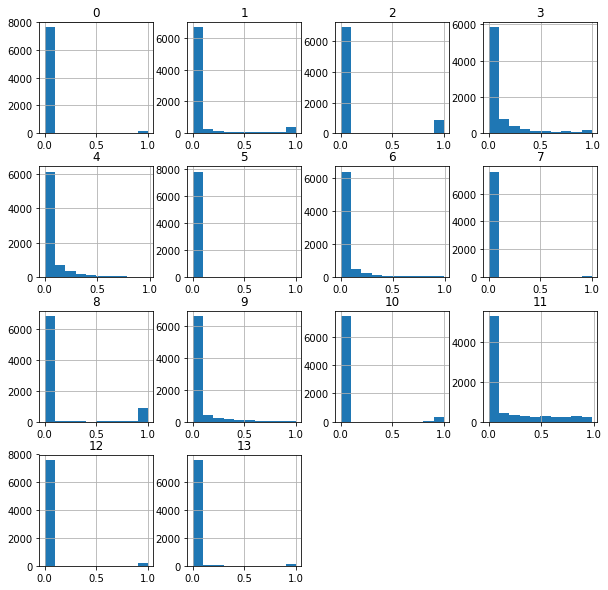

In [198]:
a = preds * weight
#pd.DataFrame(a / a.sum(axis=0)).hist(figsize=(10, 10))
pd.DataFrame(a/a.sum(axis=1).reshape(-1, 1)).hist(figsize=(10, 10))

In [195]:
a.sum(axis=1)

array([0.00096548, 0.00054293, 0.00050498, ..., 0.00108646, 0.00101524,
       0.00670921])

In [63]:
def softmax(x, axis=1):
    z = np.exp(x)
    return z/np.sum(z, axis=axis, keepdims=True)

def multi_weighted_logloss(y_true, y_preds):
    
    classes = np.array([6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])
    class_weight = pd.Series({6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1})
    
    y_p = softmax(y_preds)
    y_ohe = pd.get_dummies(y_true)
    #y_p = y_preds#[:, [c in y_ohe.columns for c in classes]]
    #class_weight = class_weight[y_true]
    class_weight = class_weight[y_ohe.columns]
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    y_p_log = np.log(y_p)
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    class_arr = class_weight.values
    y_w = y_log_ones / nb_pos

    loss = - np.sum(y_w * class_arr) / np.sum(class_arr)
    return loss, pd.DataFrame({'class_score':-y_w}, index=y_ohe.columns)

def haradasan_multi_weighted_logloss(y_true, y_preds):
    
    classes = np.array([6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])
    class_weight = pd.Series({6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1})
    
    y_p = y_preds
    y_ohe = pd.get_dummies(y_true)
    print()
    #y_p = y_preds#[:, [c in y_ohe.columns for c in classes]]
    #class_weight = class_weight[y_true]
    class_weight = class_weight[y_ohe.columns]
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    y_p_log = np.log(y_p)
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    class_arr = class_weight.values
    print(class_arr)
    y_w = y_log_ones / nb_pos

    loss = - np.sum(y_w * class_arr) / np.sum(class_arr)
    print(np.sum(class_arr))
    return loss, pd.DataFrame({'class_score':-y_w}, index=y_ohe.columns)

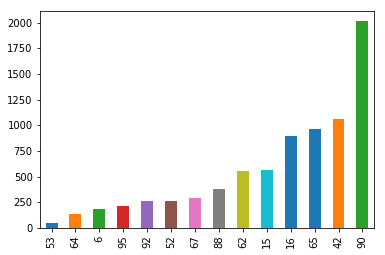

In [36]:
res = []
for _oof in oof:
#    res.append(pd.DataFrame(softmax(_oof[0])))
    res.append(pd.DataFrame(_oof[0]))
b = pd.concat(res, axis=0).sum(axis=0)#.sort_values().plot('bar')
b.index = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
b.sort_values().plot('bar')

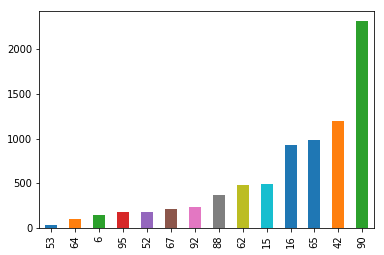

In [37]:
a = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/training_set_metadata.csv').target.value_counts()
a = a.sort_values('index')
a.plot('bar')

In [120]:
res = []
preds = []
y_true = []

for _oof in oof:
    preds.append(_oof[0])
    #preds.append(softmax(_oof[0]))
    y_true.append(_oof[1])
    #res.append(multi_weighted_logloss(_oof[1], _oof[0]))
    #res.append(multi_weighted_logloss(_oof[1], _oof[0]))

In [121]:
preds = np.concatenate(preds)
y_true = np.concatenate(y_true)

In [74]:
def multi_weighted_logloss(y_true:np.array, y_preds:np.array):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    # class_weights taken from Giba's topic : https://www.kaggle.com/titericz
    # https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
    # with Kyle Boone's post https://www.kaggle.com/kyleboone
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    if len(np.unique(y_true)) > 14:
        classes.append(99)
        class_weight[99] = 2
        
    y_p = y_preds/y_preds.sum(1)[:,None]
    # Trasform y_true in dummies
    y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set
    # we gave a special process for that class
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos

    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss


#multi_weighted_logloss(y.values, y_preds)
#multi_weighted_logloss(y.values, y_preds * weight)

In [122]:
weight = np.array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])
weight = weight / preds.sum(axis=0)

In [95]:
weight

array([0.0055116 , 0.00356578, 0.00111039, 0.00094165, 0.00375703,
       0.01854294, 0.00178777, 0.0145954 , 0.00103915, 0.00341038,
       0.00261849, 0.00049578, 0.00384017, 0.00472227])

In [123]:
weight

array([0.0050113 , 0.00280827, 0.00109873, 0.0010907 , 0.00209083,
       0.01590244, 0.00165714, 0.01057968, 0.00104005, 0.00238875,
       0.00258085, 0.00067142, 0.00370981, 0.0040143 ])

In [124]:
weight/weight.sum()

array([0.0917077 , 0.0513919 , 0.02010691, 0.01996002, 0.03826256,
       0.29101759, 0.030326  , 0.19361002, 0.01903305, 0.04371454,
       0.04722998, 0.01228717, 0.06789017, 0.07346239])

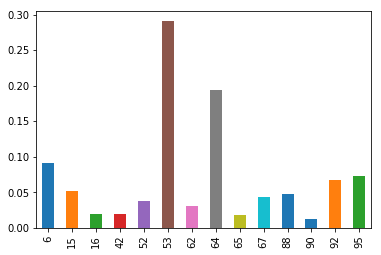

In [125]:
weight_hist = pd.Series(weight/weight.sum())
weight_hist.index = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
weight_hist.plot('bar')

In [126]:
multi_weighted_logloss(y_true, preds), multi_weighted_logloss(y_true, preds * weight)

(0.5513909235819251, 0.5972947084787806)

In [64]:
res = []
for _oof in oof:
    res.append(haradasan_multi_weighted_logloss(_oof[1], _oof[0]))

[nan nan nan ... nan nan nan]


/home/naoya.taguchi/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: operands could not be broadcast together with shapes (14,) (1574,) 

In [56]:
res[4]

(nan,     class_score
 0      0.223555
 1      0.769263
 2      0.071867
 3      1.022605
 4      2.179951
 5      0.282165
 6      1.369209
 7      0.337393
 8      0.090193
 9      1.424180
 10     0.170169
 11     0.529516
 12     0.103540
 13     0.572009)

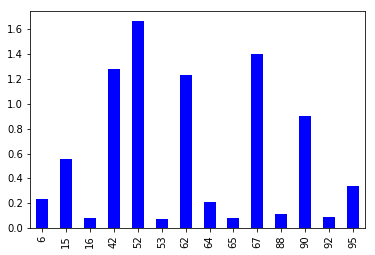

6     0.234878
15    0.558721
16    0.084848
42    1.280968
52    1.667534
53    0.070686
62    1.230641
64    0.213642
65    0.079185
67    1.398354
88    0.110508
90    0.898973
92    0.086755
95    0.341162
dtype: float64

In [7]:
df = pd.concat([_res[1] for _res in res], axis=1).mean(axis=1).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
df.plot(kind='bar', color='blue')
plt.show()
df

### peak around 系 features が ddf にきいている仮説検証

In [9]:
meta_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/training_set_metadata.csv')

In [3]:
with open('../oof/Booster_weight-multi-logloss-0.531565_2018-12-05-15-58-16.pkl', 'rb') as fin:
    peak_oof = pickle.load(fin)
    
with open('../oof/Booster_weight-multi-logloss-0.558786_2018-12-06-04-21-11.pkl', 'rb') as fin:
    non_peak_oof = pickle.load(fin)

In [4]:
peak_df = pd.DataFrame(np.concatenate([np.concatenate([oof[0], oof[1].reshape((-1, 1)), oof[2].reshape(-1, 1)], axis=1) for oof in peak_oof], axis=0),
                       columns=[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95, 'le_target', 'index'])
#peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]] = softmax(peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
peak_df.sort_values('index', inplace=True)
peak_df.reset_index(drop=True, inplace=True)
peak_df = pd.concat([peak_df, meta_df], axis=1)
peak_df

,6,15,16,42,52,53,62,64,65,67,...,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,0.094669,-0.474149,1.924439,-0.857591,-0.886045,1.338675,-1.015197,-1.304603,-1.142617,-1.158690,...,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,-1.048359,0.181110,1.343293,-0.254294,-0.160231,-1.176438,-0.987500,-0.623758,-1.125044,-0.709427,...,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,-1.276170,-0.506407,-1.342813,3.342510,2.238070,-1.179151,3.055031,-1.400126,-1.289649,2.663380,...,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,-1.256426,0.238181,-1.275547,2.170094,2.635562,-1.194324,-0.222749,-1.384541,-1.181935,-0.012400,...,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,-1.274876,-1.109096,-1.358685,1.355243,4.076348,-1.216639,0.328463,-1.459170,-1.277088,3.543513,...,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,0.864592,-0.562253,-0.021607,0.483446,-0.722777,-1.162078,-0.241033,-1.177003,6.672310,-0.438065,...,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,-1.186811,0.715166,-1.309044,3.742992,0.281445,-0.973184,0.322628,0.065479,-1.224558,0.405428,...,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90
7,-1.241796,-0.893519,-1.239662,1.734483,-0.614838,-1.178858,1.989762,0.610912,-1.226520,1.217569,...,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,0.021,42
8,-1.253628,-1.174751,-1.278365,0.696807,2.580064,-1.165884,-0.282909,-1.441483,-1.193408,-0.655188,...,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,0.027,90
9,-1.047051,-0.215641,0.867160,-0.156327,0.016337,-1.132473,-0.355015,-1.061496,6.288858,-0.751328,...,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,0.018,65


In [5]:
non_peak_df = pd.DataFrame(np.concatenate([np.concatenate([oof[0], oof[1].reshape((-1, 1)), oof[2].reshape(-1, 1)], axis=1) for oof in non_peak_oof], axis=0),
                       columns=[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95, 'le_target', 'index'])
#non_peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]] = softmax(non_peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
non_peak_df.sort_values('index', inplace=True)
non_peak_df.reset_index(drop=True, inplace=True)
non_peak_df = pd.concat([non_peak_df, meta_df], axis=1)
non_peak_df

,6,15,16,42,52,53,62,64,65,67,...,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,-0.439751,-0.870546,1.792967,-0.866711,-0.953035,1.374575,-0.947341,-1.197990,-1.081552,-1.072882,...,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,-1.208512,-0.199306,1.084988,-0.156040,-0.085439,-1.206434,-0.880561,-0.503566,-1.258337,-0.881375,...,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,-1.319706,-0.563369,-1.352154,3.410993,1.877814,-1.203676,3.061527,-1.605195,-1.284219,2.072028,...,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,-1.271834,-0.054926,-1.311756,2.051068,3.399276,-1.239392,-0.371167,-1.340497,-1.208565,-0.399464,...,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,-1.294972,-0.761960,-1.367619,1.224395,3.830249,-1.225992,0.357636,-1.514340,-1.280445,3.121077,...,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,0.867173,-0.373244,-0.049280,0.095193,0.087533,-1.179031,-0.218587,-0.962152,6.855354,-0.786242,...,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,-1.329893,1.210398,-1.340068,3.878732,0.583548,-0.975824,0.321922,-0.054907,-1.235524,0.650209,...,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90
7,-1.290685,-0.753904,-1.295045,2.103906,0.141875,-1.186783,1.972082,0.359966,-1.240949,0.842804,...,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,0.021,42
8,-1.289277,-0.640634,-1.296554,0.740187,1.866814,-1.194046,-0.385915,-1.473749,-1.197881,-0.896163,...,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,0.027,90
9,-0.964501,-0.313363,0.935937,-0.109097,-0.126741,-1.172534,-0.072853,-0.982808,5.863551,-0.959112,...,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,0.018,65


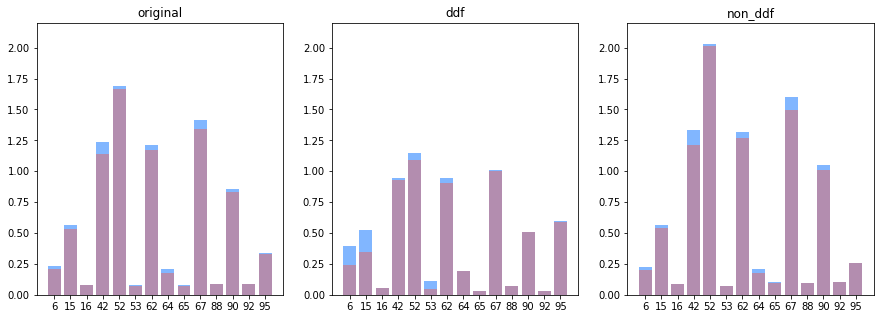

In [143]:
# peak_df について、ddf と non ddf の　loss graph を出してみる
peak_losses = multi_weighted_logloss(peak_df.le_target.values, peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
peak_ddf_losses = multi_weighted_logloss(peak_df[peak_df.ddf == 1].le_target.values, peak_df[peak_df.ddf == 1][[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
peak_non_ddf_losses = multi_weighted_logloss(peak_df[peak_df.ddf == 0].le_target.values, peak_df[peak_df.ddf == 0][[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)

non_peak_losses = multi_weighted_logloss(non_peak_df.le_target.values, non_peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
non_peak_ddf_losses = multi_weighted_logloss(non_peak_df[non_peak_df.ddf == 1].le_target.values, non_peak_df[non_peak_df.ddf == 1][[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)
non_peak_non_ddf_losses = multi_weighted_logloss(non_peak_df[non_peak_df.ddf == 0].le_target.values, non_peak_df[non_peak_df.ddf == 0][[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]].values)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#fig.title('compering classwise losses of original, ddf, non_ddf')


df = pd.DataFrame(non_peak_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[0].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#056FFF', tick_label=df.index, alpha=0.5)
axs[0].set_title('original')

df = pd.DataFrame(non_peak_ddf_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[1].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#056FFF', tick_label=df.index, alpha=0.5)
axs[1].set_title('ddf')

df = pd.DataFrame(non_peak_non_ddf_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[2].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#056FFF', tick_label=df.index, alpha=0.5)
axs[2].set_title('non_ddf')

df = pd.DataFrame(peak_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[0].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#E56660', tick_label=df.index, alpha=0.5)
axs[0].set_title('original')

df = pd.DataFrame(peak_ddf_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[1].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#E56660', tick_label=df.index, alpha=0.5)
axs[1].set_title('ddf')

df = pd.DataFrame(peak_non_ddf_losses[1]).rename(index={0:6, 1:15, 2:16, 3:42, 4:52, 5:53, 6:62, 7:64, 8:65, 9:67, 10:88, 11:90, 12:92, 13:95})
axs[2].bar([i for i in range(df.shape[0])], df.values.reshape(-1), color='#E56660', tick_label=df.index, alpha=0.5)
axs[2].set_title('non_ddf')

axs[0].set_ylim((0., 2.2))
axs[1].set_ylim((0., 2.2))
axs[2].set_ylim((0., 2.2))

plt.show()

### train と test の lightcurve を見て、なぜ peak around がうまく行かなかったのかを調査

In [113]:
train_set_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/training_set.csv')
test_set_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/test_set_sample.csv')

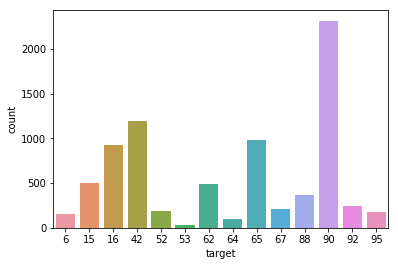

In [11]:
import seaborn as sns
sns.countplot(meta_df.target)

#### oof の内、向上があったものなかったものを比較する

In [8]:
diff_df = pd.DataFrame(softmax(peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95,]].values) - softmax(non_peak_df[[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95,]].values), columns=[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95,])
diff_df['target'] = peak_df.target
diff_df

,6,15,16,42,52,53,62,64,65,67,88,90,92,95,target
0,0.000084,0.000039,0.000191,0.000004,0.000007,4.937973e-06,-0.000002,-3.080002e-06,-9.902533e-07,-2.366476e-06,-0.000010,0.000004,-0.000314,-0.000002,92
1,0.000003,0.000025,0.000052,-0.000010,-0.000009,-6.724625e-07,-0.000005,-7.922603e-06,1.769741e-06,3.989906e-06,-0.000197,-0.000006,0.000011,0.000139,88
2,-0.000228,-0.000386,-0.000333,-0.067341,0.025919,-3.290116e-04,-0.031694,2.838436e-04,-4.071797e-04,6.810599e-02,-0.000300,0.008109,-0.000408,-0.000993,42
3,0.000828,0.006159,0.000858,0.032393,-0.091421,9.520799e-04,0.003127,6.054008e-04,9.195095e-04,5.332085e-03,0.000900,0.037087,0.000927,0.001332,90
4,-0.000685,-0.002139,-0.000656,-0.005813,-0.036163,-7.553512e-04,-0.004042,-4.970708e-04,-7.264460e-04,1.930724e-02,-0.000654,0.034265,-0.000747,-0.000693,90
5,0.000485,-0.000006,0.000231,0.000880,-0.000532,7.029179e-05,0.000144,-1.320784e-05,-1.872990e-03,3.315872e-04,0.000061,0.000087,0.000074,0.000059,65
6,0.000636,-0.017846,0.000175,-0.076367,-0.006233,9.775542e-05,0.000320,1.928185e-03,1.099701e-04,-5.477187e-03,0.000451,0.104803,0.000610,-0.003207,90
7,0.001571,0.000174,0.001620,-0.040320,-0.013241,1.362244e-03,0.034175,1.816577e-02,1.346729e-03,4.109327e-02,0.001292,0.046459,0.001293,-0.094989,42
8,-0.000184,-0.001182,-0.000199,-0.001975,0.018453,-2.101246e-04,-0.000281,-1.554607e-04,-2.347905e-04,6.583314e-05,-0.000205,-0.013234,-0.000211,-0.000446,90
9,-0.000414,-0.000552,-0.002713,-0.000921,-0.000583,-2.687244e-04,-0.001294,-4.045365e-04,8.973628e-03,-1.996055e-04,-0.000315,-0.000612,-0.000344,-0.000352,65


In [ ]:
#  non_peak でミスっていたが peak で ok になった特徴を調べる
diff_df

In [135]:
target_dfs = diff_df.apply(lambda x: x.loc[int(x.target)], axis=1)
target_dfs

0      -0.000314
1      -0.000197
2      -0.067341
3       0.037087
4       0.034265
5      -0.001873
6       0.104803
7      -0.040320
8      -0.013234
9       0.008974
10     -0.014531
11      0.005904
12     -0.068940
13      0.014446
14      0.039366
15     -0.002376
16      0.064517
17      0.021751
18      0.069171
19     -0.096309
20     -0.001731
21      0.082653
22     -0.002427
23      0.027015
24     -0.001613
25     -0.008973
26      0.028614
27      0.066044
28     -0.034230
29     -0.097507
          ...   
7818    0.015100
7819    0.052259
7820    0.045660
7821   -0.000311
7822   -0.007610
7823    0.017729
7824   -0.037531
7825   -0.136799
7826    0.010264
7827    0.015861
7828   -0.000347
7829   -0.003330
7830    0.000421
7831    0.044308
7832   -0.001238
7833    0.316066
7834    0.004828
7835    0.075730
7836   -0.020419
7837    0.014048
7838   -0.000906
7839    0.001079
7840    0.002541
7841   -0.003952
7842    0.008949
7843   -0.001013
7844    0.062001
7845   -0.0323

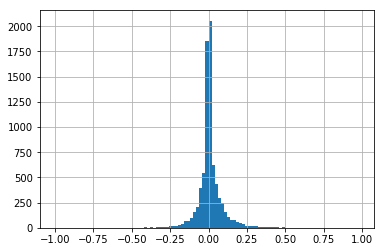

In [138]:
target_dfs.hist(bins=np.arange(-1., 1., 0.02))

In [3]:
import pandas as pd
onodera_df = pd.read_feather('../features/train/meta_features.ftr')

In [7]:
%%time
import pickle
with open('../lcfit/LCfit_features_train_20181129.pkl', 'rb') as fin:
    onodera_df = onodera_df.merge(pickle.load(fin), on='object_id', how='left')

CPU times: user 1.38 s, sys: 2.12 s, total: 3.5 s
Wall time: 3.5 s


In [9]:
onodera_x_train = onodera_df[FEATURES_TO_USE + ['target', 'object_id']]
onodera_x_train

,hostgal_photoz_err,distmod,lumi_dist,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_var,flux_skew,...,abs_magnitude_var,abs_magnitude_skew,0_minus_1_ratsqmax,1_minus_2_ratsqmax,2_minus_3_ratsqmax,3_minus_4_ratsqmax,4_minus_5_ratsqmax,5_minus_0_ratsqmax,target,object_id
0,0.0000,NaN,NaN,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,1.553226e+05,-0.349540,...,NaN,NaN,-25460.233922,-1513.209674,6513.902478,7954.188877,9656.990990,2848.361250,92,615
1,0.2552,45.4063,1.205758e+10,-14.735178,14.770886,-1.423351,-0.873033,6.471144,4.187570e+01,0.014989,...,0.748045,1.027819,-147.919028,5.403025,96.923679,44.362897,42.222386,-40.992958,88,713
2,0.0157,40.2561,1.125175e+09,-19.159811,47.310059,2.267434,0.409172,8.022239,6.435631e+01,3.177854,...,2.549249,0.030753,-0.163608,-397.506608,-1.536451,85.959455,243.949917,69.297295,42,730
3,1.1523,40.7951,1.442182e+09,-15.494463,220.795212,8.909206,1.035895,27.558208,7.594548e+02,4.979826,...,3.485808,-0.139249,-17916.596607,-3886.566934,9979.827275,7671.387487,3872.061153,279.887626,90,745
4,0.0176,40.4166,1.211490e+09,-16.543753,143.600189,7.145702,1.141288,20.051722,4.020716e+02,4.406298,...,3.474847,0.155266,-933.189772,-4709.195568,1539.110397,1854.888721,2010.826078,237.560144,90,1124
5,0.0000,NaN,NaN,-12.695161,71.678154,0.367212,0.208109,4.962633,2.462772e+01,9.125056,...,NaN,NaN,868.202174,20.616954,-0.667032,-31.536959,32.924777,-889.539913,65,1227
6,0.0304,39.7279,8.822263e+08,-13.854152,1448.715698,30.333023,0.337299,167.317942,2.799529e+04,6.278757,...,4.543033,-1.480841,-21309.848491,-6316.155132,1184.554734,9425.353076,18874.774483,-1858.678670,90,1598
7,0.0100,43.1524,4.270513e+09,-14.525748,34.559826,1.760026,0.623454,5.273147,2.780608e+01,2.486305,...,1.955735,0.379396,-1.161256,-0.848435,-10.638785,-21.865421,17.629618,16.884279,42,1632
8,0.3360,41.1401,1.690519e+09,-13.367912,231.828339,19.228827,1.252908,48.004394,2.304422e+03,2.845162,...,5.465108,0.072982,-12320.580478,-4932.443565,6691.711951,6115.031126,3992.395864,453.885102,90,1920
9,0.0000,NaN,NaN,-52.764721,30.658575,-0.085210,0.166696,6.288463,3.954477e+01,-1.709852,...,NaN,NaN,12.375885,-500.120793,503.514254,0.458638,0.106625,-16.334610,65,1926


In [11]:
onodera_x_train.to_pickle('../share/guchio_xtrain_20181208.pkl.gz', compression='gzip')

In [3]:
import pandas as pd
df = pd.read_feather('../features/train/meta_features.ftr')
df

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,...,band_flux_diff_diff_rat,band_flux_max_min_rat,internal,lumi_dist,peak_kurt_14to30,peak_kurt_14to90,peak_kurt_30to90,peak_skew_14to30,peak_skew_14to90,peak_skew_30to90
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,...,0.862529,0.137471,True,NaN,-0.344131,0.356108,0.700239,0.247766,-0.090048,-0.337814
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,...,0.295710,0.704290,False,1.205758e+10,3.151685,4.811238,1.659554,1.800865,2.203534,0.402669
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,...,0.863304,0.136696,False,1.125175e+09,0.621023,-2.303079,-2.924102,-0.809068,-2.173984,-1.364916
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,...,0.901826,0.098174,False,1.442182e+09,0.760920,-3.942460,-4.703379,-1.481862,-3.058474,-1.576613
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,...,0.924220,0.075780,False,1.211490e+09,-0.316458,-4.143393,-3.826935,-0.200796,-2.100464,-1.899668
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,...,0.922930,0.077070,True,NaN,-26.034184,-50.454895,-24.420711,-1.732106,-2.800942,-1.068836
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,...,0.804982,0.195018,False,8.822263e+08,-1.546998,-8.788505,-7.241507,-1.166983,-2.769199,-1.602216
7,1632,348.595886,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,...,0.856481,0.143519,False,4.270513e+09,-1.667797,-2.727747,-1.059950,-0.087282,-0.207297,-0.120015
8,1920,149.414062,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,...,0.889938,0.110062,False,1.690519e+09,1.321251,-0.221630,-1.542881,-1.496161,-2.364431,-0.868270
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,...,0.895393,0.104607,True,NaN,-7.454864,-18.165876,-10.711012,5.555260,6.149241,0.593982


In [4]:
df['my_skew']

0         1845.698342
1        -2301.327993
2           10.738532
3        -2218.606968
4        -6928.779757
5         -208.835222
6           -8.175490
7            0.000050
8        -2084.609837
9            1.944098
10          -0.024551
11         316.563299
12        -238.815916
13          48.854060
14        5651.155123
15          22.537399
16         287.117451
17        -158.843466
18       19855.437477
19        -196.848816
20        1148.928203
21          90.597892
22                NaN
23         -11.210014
24          16.727810
25       -3713.000462
26     -996398.783361
27       -1704.405767
28        3960.344709
29           0.721058
            ...      
7818       -26.428992
7819     -1174.304995
7820       -45.709031
7821       340.593088
7822        37.605563
7823        27.456397
7824       -30.098753
7825      -256.167472
7826      -162.194558
7827        -4.153044
7828        -6.221731
7829     13574.836281
7830       583.158998
7831      -608.201321
7832    -7

In [7]:
df = pd.read_feather('../features/train/set_deficits_features.ftr')
df

,object_id,max_mjd_bf_det1,mjd_diff_af_det1
0,713,59825.2600,1.0052
1,730,60294.0708,0.0077
2,745,59910.0685,0.0110
3,1124,60264.0465,0.0076
4,1227,59924.1060,0.9968
5,1598,60606.0601,NaN
6,1632,59767.3122,0.0112
7,1920,59973.2239,2.9705
8,1926,59594.3015,0.9999
9,2103,60211.0502,1.0006
